# k-Nearest Neighbors (kNN) with the iris dataset

This notebook aims to apply the k-Nearest Neighbors (kNN) classification model. The iris dataset will be used to construct two and three classes classification models based on these features:

- Two features (Sepal_Length, Sepal_Width)

- Two features (Pepal_Length, Pepal_Width)

- Four features (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width)


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris


## Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

## Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "datasets/iris/iris.csv"

# Load the dataset from HHDD
df  = pd.read_csv(url, header = None, names = colnames )

df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Encoding the class label and remove one of the classes

Encoding the class label and remove one of the classes


In [3]:
# Encoding the class label categorical column: from string to num
df = df.replace({"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })

# Visualize the dataset
df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Now the label/category is numeric

Remove all observations from one of the classes

In [4]:
# Discard observation for one of the classes, e.g., class "setosa": to have only two classes in our dataset
#Label2Remove = 3 # (1,2,3)
#df = df[df.Flower!=Label2Remove]
#df

# NOTE: comment this if cell if you want to use the three classes


## k-Nearest Neighbors (kNN) step-by-step



1) Get training data

In [5]:
# Construct data frames for X and y data
dfX  = df.drop('Flower', axis=1)
dfy  = df.Flower

dfX


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


2) Get neew observation to classify

In [6]:
# New observation to classify

#xnew = [3.9, 3.1]
xnew = [6, 2.8, 4.9, 1.5]


3) Compute distances between xnew and all point to the train set


In [7]:
# Define a function to calculate distance between two p-dimensional points

def My_ComputeEuclideanDistance(x, y):    
    
    # Calculate the number of dimensions
    p = len(x)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate Euclidean distance
    for i in range(p):
        distance += (x[i] - y[i])**2
        
    distance = distance**(1/2)
    
    return distance

def My_ComputeManhattanDistance(x, y):    
    
    # Calculate the number of dimensions
    p = len(x)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate Manhattan distance
    for i in range(p):
        distance += abs(x[i] - y[i])
    
    return distance

def My_ComputeMinkowskiDistance(x, y, r):    
    # Manhattan distance (r=1)
    # Euclidean distance (r=2)
    # Minkowski distance (r>2)
    
    # Calculate the number of dimensions
    p = len(x)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for i in range(p):
        distance += abs(x[i] - y[i])**r
        
    distance = distance**(1/r)
    
    return distance

# Test the distance funtions

# Define two p-dimensional points
x1 = [ 1.5,  6.4,  5.5, -2.9, -8.8, -19.2]
x2 = [-7.5, -8.8, -9.8,  6.7, 12.3,  36.8] 

# Compute Euclidean Distance
d1 = My_ComputeEuclideanDistance(x1, x2)
d2 = My_ComputeMinkowskiDistance(x1, x2, 2)
print(d1)
print(d2)

# Compute Manhattan Distance
s1 = My_ComputeManhattanDistance(x1, x2)
s2 = My_ComputeMinkowskiDistance(x1, x2, 1)
print(s1)
print(s2)

64.95767852994749
64.95767852994749
126.2
126.2


In [8]:
# Calculate distance between xnew and all points in the train set

D = []

for i in dfX.index: 
    pi = dfX.iloc[i,:].tolist()
    di = My_ComputeMinkowskiDistance(xnew, pi, 2)
    D.append( di )
    
# Create a dataframe for the distances
dfDist = pd.DataFrame(data=D, index=dfX.index, columns=['Distances'])
dfDist


,Distances
0,3.903844
1,3.897435
2,4.062019
3,3.911521
4,3.947151
...,...
145,1.122497
146,0.591608
147,0.793725
148,1.135782


4) Find the k nearest neighbors

In [9]:
# Find the k nearest neighbors
k = 5

dfkNN = dfDist.sort_values(by=['Distances'], axis=0)[:5]
dfkNN


,Distances
83,0.244949
63,0.264575
133,0.360555
73,0.374166
127,0.374166


In [10]:
# Get the labels of the k nearest neighbors
kNNlabels = dfy[dfkNN.index]
kNNlabels


83     2
63     2
133    3
73     2
127    3
Name: Flower, dtype: int64

5) Decide the more frequent label

In [11]:
from collections import Counter

# Create counter object to track the labels
Conteo = Counter( kNNlabels )
print(Conteo)

# Get most common label of all the nearest neighbors
ypredicted = Conteo.most_common()[0][0]
ypredicted


Counter({2: 3, 3: 2})


2

In [12]:
print("For the input data: ")
print(xnew)

print("The predicted class is:")
print(ypredicted)

For the input data: 
[6, 2.8, 4.9, 1.5]
The predicted class is:
2


# Get dataset of variables **X** and labels **y**  to be used with sklearn

Get dataset of variables **X** and labels **y**

In [13]:
# Select variables (one, two, three, four?)
#X  = df[["Sepal_Length", "Sepal_Width"]].values
#X  = df[["Petal_Length", "Petal_Width"]].values
X  = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values

# Get the class of each observation
y  = df["Flower"].values



## k-Nearest Neighbors (kNN) using sklearn

k-Nearest Neighbors (kNN) using sklearn

In [14]:
# Import library
from sklearn.neighbors import KNeighborsClassifier

# Create model
kNN    = KNeighborsClassifier(n_neighbors=5, p=2)

# Fit the model for the training data
kNN.fit(X, y)

# New observation to classify
#xnew = [3.9, 3.1]
#xnew = [6, 2.8, 4.9, 1.5]

# Make a prediction
ypredicted  = kNN.predict([xnew])


Make predictions k-Nearest Neighbors (kNN)

In [15]:
print("For the input data: ")
print(xnew)

print("The predicted class is:")
print(ypredicted)


For the input data: 
[6, 2.8, 4.9, 1.5]
The predicted class is:
[2]


Explore and plot the kNN model

In [16]:
kNN


KNeighborsClassifier()

Plot Decision Boundary (This only works for two classes)

In [17]:
# from sklearn.inspection import DecisionBoundaryDisplay


# Evaluation of the k-Nearest Neighbor (kNN) model


## Holdout

Holdout: spliting the dataset in train and test sets once

In [34]:
# Import sklearn funtions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Split data in train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30) # , random_state = 0

# Create models
clf_LogReg    = LogisticRegression(C=1e5)
clf_kNN1ve    = KNeighborsClassifier(n_neighbors=1, p=2)
clf_kNN5ve    = KNeighborsClassifier(n_neighbors=5, p=2)
clf_kNN20ve    = KNeighborsClassifier(n_neighbors=10, p=2)


# Fit the model for the training data
clf_LogReg.fit(Xtrain,ytrain)
clf_kNN1ve.fit(Xtrain,ytrain)
clf_kNN5ve.fit(Xtrain,ytrain)
clf_kNN20ve.fit(Xtrain,ytrain)

# Make the predictions using the test set
ypred_LogReg  = clf_LogReg.predict(Xtest)
ypred_kNN1ve  = clf_kNN1ve.predict(Xtest)
ypred_kNN5ve  = clf_kNN5ve.predict(Xtest)
ypred_kNN20ve  = clf_kNN20ve.predict(Xtest)


Accuracy Logistic Regression:  97.78 %
Accuracy kNN with k=1:         97.78 %
Accuracy kNN with k=5:         97.78 %
Accuracy kNN with k=20:        100.00 %


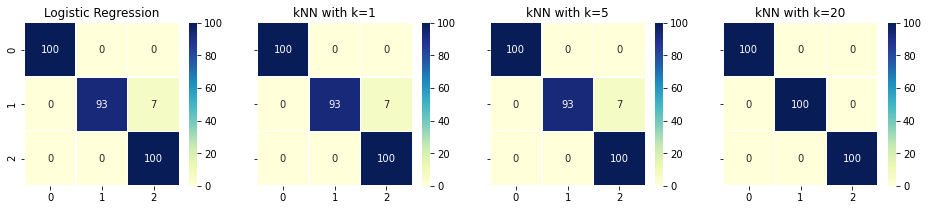

In [35]:
# Calculate tota accuracy
acc_LogReg    = 100*accuracy_score(ytest, ypred_LogReg)
acc_kNN1ve    = 100*accuracy_score(ytest, ypred_kNN1ve)
acc_kNN5ve    = 100*accuracy_score(ytest, ypred_kNN5ve)
acc_kNN20ve    = 100*accuracy_score(ytest, ypred_kNN20ve)
print("Accuracy Logistic Regression:  {:.2f} %".format(acc_LogReg) )
print("Accuracy kNN with k=1:         {:.2f} %".format(acc_kNN1ve) )
print("Accuracy kNN with k=5:         {:.2f} %".format(acc_kNN5ve) )
print("Accuracy kNN with k=20:        {:.2f} %".format(acc_kNN20ve) )

# Calculate confusion matrix
CM_LogReg     = np.round(100*confusion_matrix(ytest, ypred_LogReg, normalize = 'true'))
CM_kNN1ve     = np.round(100*confusion_matrix(ytest, ypred_kNN1ve, normalize = 'true'))
CM_kNN5ve     = np.round(100*confusion_matrix(ytest, ypred_kNN5ve, normalize = 'true'))
CM_kNN20ve     = np.round(100*confusion_matrix(ytest, ypred_kNN20ve, normalize = 'true'))


# Plot confusion matrices
fig, axes = plt.subplots(1, 4, figsize=(16, 3), sharey=True)

sns.heatmap(CM_LogReg, annot=True, fmt='g', ax=axes[0], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[0].set_title('Logistic Regression'); 

sns.heatmap(CM_kNN5ve, annot=True, fmt='g', ax=axes[1], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[1].set_title('kNN with k=1'); 

sns.heatmap(CM_kNN5ve, annot=True, fmt='g', ax=axes[2], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[2].set_title('kNN with k=5'); 

sns.heatmap(CM_kNN20ve, annot=True, fmt='g', ax=axes[3], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[3].set_title('kNN with k=20'); 

plt.show()

# Recall that:
# {"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} }


## Repeated k-fold

Check the acurracy of the model using repeated k-fold cross-validation

# Final remarks

- kNN is a Non-parametric ML algorithm used for either regression or classification

- The idea is simple: Given a new observation and a train dataset predict the label using the more frequent label of all of k nearest neighbors 

- Can do multiclass automatically

- Known as instance-based Learning or “Lazy” learning because:
    - No model generation
    - Learn consits of simply storing all training data
    - All training data used in the prediction phase
    - Fast training; Slow testing


# Activity



1- Built your own function for the kNN classifier
    - Construct an external function to make predictions  **PredictedLabel = My_kNN(Xtrain, ytrain, k, r, xnew)**
    - Use the iris dataset to evaluate your implementation using repeated k-fold cross-validation (5-folds and 20 repetitions)
    - Interpret results and provide comments and conclusions



2- Explore the effect of varying k
    - Use the iris dataset to evaluate classification performance of the kNN model for different values of k (k=1,2,4,8,16,32,64,128)
    - Construct a plot of accuracy versus k
    - Use your own function and the sklearn library
    - Interpret results and provide comments and conclusions



3- Explore the effect for different measures of distance (r)
    - Use the iris dataset to evaluate classification performance of the kNN model for different measures of distance (r=1,2,3,4,5)
    - Construct a plot of r versus k
    - Use your own function and the sklearn library
    - Interpret results and provide comments and conclusions


